<a href="https://colab.research.google.com/github/dalozgar/AO/blob/main/AG2_DAVID_ANGEL_LOZANO_GARCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG2 - Actividad Guiada 2
Nombre: DAVID ANGEL LOZANO GARCIA

Link: https://colab.research.google.com/drive/1fIl2lTC1EiHCj8bkNl4Smfuz3Cs1QUd9?usp=sharing


Github: https://github.com/dalozgar/AO


In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

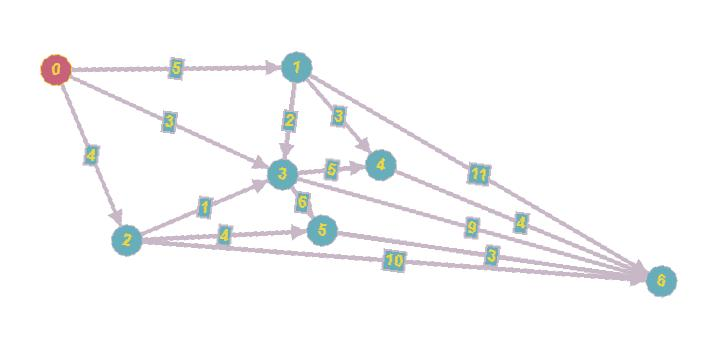

Mi solución particular a este problema se encuentra en 
https://github.com/dalozgar/AO/blob/main/dijkstra.ipynb

y fue una de mis aportaciones al foro de intervenciones extraordinarias.

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################  
def Precios(TARIFAS):
################################################################ 
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 3,6) 


La ruta es:


3

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
import numpy as np
from queue import Queue
from datetime import datetime
import matplotlib.pyplot as plt

################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

matriz_costes = np.array(COSTES)
        

In [7]:
#Calculo del valor de una solucion parcial
def get_cost(propuesta, costes):
  VALOR = 0
  for i in range(len(propuesta)):
    VALOR += costes[propuesta[i]][i] 
  return VALOR



get_cost((0, 1, 2, 3  ),matriz_costes)

73

In [8]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def cota_inf (propuesta, costes):
  ci = get_cost (propuesta, costes)
  ini = len(propuesta)
  fin = len(costes)


  for tarea in range (fin):
    if tarea not in propuesta:
      min_coste_en_columna = np.inf
      for agente in range (ini, fin):
        # print (f"costes[agente][tarea] = costes [{agente}][{tarea}] = { costes [agente][tarea]}")
        if min_coste_en_columna > costes [agente][tarea]:
          min_coste_en_columna = costes [agente][tarea]
      ci += min_coste_en_columna
      

  return ci


def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

cota_inf((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(nodo, n):
  hijos = []
  for i in range(n ):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)    })
  return hijos


In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = get_cost(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':cota_inf((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':cota_inf(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(matriz_costes)

La solucion final es: [{'s': (0, 3, 1, 2), 'ci': 61}]  en  19  iteraciones  para dimension:  4


# SOLUCIÓN MEDIANTE FUERZA BRUTA:
A continuación se propone una función que obtiene la asignación de mínimo coste mediante la exploración de todas las posibles asignaciones.

In [12]:

####################
# 0. Diseño de algoritmo de fuerza bruta para resolver este problema
def fuerza_bruta(costes):
    dimension = len(costes)  
   

    nodo_0 = () #tupla inicial, vacía
    
    mejor_coste = np.inf
    mejor_propuesta = None
    
    # Inicializar la cola de nodos, tamaño infinito (maxsize = 0)
    q_nodos = Queue(maxsize = 0)
    q_nodos.put(nodo_0)
    
    iteracion =0
    
    while (q_nodos.qsize() >0 ): #mientras haya nodos en al cola
    
        iteracion +=1
        
        nodo = q_nodos.get()
        hijos = crear_hijos(nodo, dimension)
        
        for hijo in hijos:
            
            q_nodos.put(hijo['s'])
            
            if (len (hijo['s'])== dimension): #solucion completa
                coste = get_cost(hijo['s'], costes)
                
                if (coste < mejor_coste):
                    mejor_coste = coste
                    mejor_propuesta = hijo['s']

        
    #print (f"FUERZA BRUTA: \nMejor solucion = {mejor_propuesta} con coste {mejor_coste} encontrada en {iteracion} iteraciones")
    return mejor_propuesta, mejor_coste, iteracion
   
res = fuerza_bruta(matriz_costes)
print (f"FUERZA BRUTA: \nMejor solucion = {res[0]} con coste {res[1]} encontrada en {res[2]} iteraciones")
    

FUERZA BRUTA: 
Mejor solucion = (0, 3, 1, 2) con coste 61 encontrada en 65 iteraciones


# GENERACIÓN DE MATRICES ALEATORIAS PARA n DIMENSIONES

Se propone la siguiente función, que genera matrices de nxn con valores aleatorios entre 1 y max_value

In [13]:

# 1. Generar matriz de costes aleatoria de dimension determinada

# Función que genera un array de puntos de n_dim dimensiones 
# (n_dim agentes y n_dim tareas), 
# y un coste máximo de max_value en cada tarea
def genera_matriz (n_dim, max_value):
    array = np.array ([[np.random.randint(1, max_value+1)] 
                       for x in range (n_dim*n_dim)])
    return array.reshape((n_dim,n_dim))

genera_matriz (8, 5)

array([[1, 4, 5, 1, 5, 4, 4, 1],
       [5, 4, 5, 2, 1, 1, 2, 1],
       [3, 5, 2, 4, 5, 5, 4, 1],
       [4, 3, 2, 5, 4, 3, 5, 4],
       [2, 2, 1, 5, 3, 1, 4, 5],
       [1, 2, 5, 2, 1, 5, 4, 2],
       [4, 5, 1, 3, 1, 4, 3, 4],
       [1, 4, 4, 3, 3, 5, 5, 1]])

# ANÁLISIS DE RENDIMIENTO

En el siguiente apartado se realizan pruebas de rendimiento para comparar ambos algoritmos (fuerza bruta y ramificación y poda)

Iteracion 3
La solucion final es: (0, 1, 2)  en  1  iteraciones  para dimension:  3
La solucion final es: [{'s': (2, 1, 0), 'ci': 26}]  en  5  iteraciones  para dimension:  3
La solucion final es: [{'s': (1, 0, 2), 'ci': 27}]  en  5  iteraciones  para dimension:  3
Iteracion 4
La solucion final es: [{'s': (1, 0, 2, 3), 'ci': 16}]  en  15  iteraciones  para dimension:  4
La solucion final es: [{'s': (2, 1, 3, 0), 'ci': 32}]  en  22  iteraciones  para dimension:  4
La solucion final es: [{'s': (2, 1, 0, 3), 'ci': 27}]  en  5  iteraciones  para dimension:  4
Iteracion 5
La solucion final es: [{'s': (2, 0, 4, 1, 3), 'ci': 28}]  en  45  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 3, 2, 1, 4), 'ci': 41}]  en  24  iteraciones  para dimension:  5
La solucion final es: [{'s': (2, 4, 3, 0, 1), 'ci': 30}]  en  36  iteraciones  para dimension:  5
Iteracion 6
La solucion final es: [{'s': (0, 2, 1, 3, 4, 5), 'ci': 37}]  en  32  iteraciones  para dimension:  6
La solucion final e

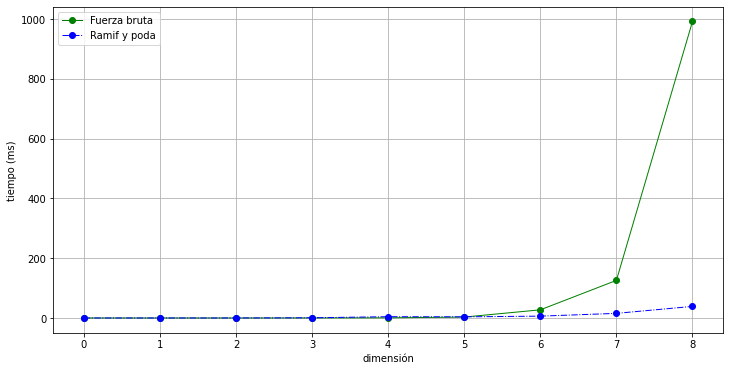

In [14]:

def timed_function (f, n_dim, max_value,loops):  # timer function
    tstart = datetime.now()
    for i in range(loops):
        
        costes_testeo = genera_matriz(n, max_value)
        f(costes_testeo)       
       
    return ((datetime.now()-tstart)/loops)


### Inicio de pruebas ##############################
max_n_dim = 8
max_value = 20
loops = 3

t_fuerzabruta = np.zeros(max_n_dim+1)
t_ramificacionypoda = np.zeros(max_n_dim+1)


for n in range (3, max_n_dim+1):
    tstart = datetime.now()
    for i in range(loops):
        costes_testeo = genera_matriz(n, max_value)
    tbase = ((datetime.now()-tstart)/loops).total_seconds() *1000  # base time: generating the matrix
    
    print (f"Iteracion {n}")

    t_fuerzabruta [n]= timed_function (fuerza_bruta, n, max_value, loops).total_seconds() *1000 -tbase
    t_ramificacionypoda [n] = timed_function (ramificacion_y_poda, n, max_value, loops).total_seconds() *1000 -tbase
    
    
   
### Representación gráfica #########################

x_data = np.arange(max_n_dim+1)
fig,axis = plt.subplots(1,1)
axis.plot(x_data,t_fuerzabruta,'go-',label='Fuerza bruta',linewidth=1) # creación del gráfico
axis.plot(x_data,t_ramificacionypoda,'bo-.',label='Ramif y poda',linewidth=1) # creación del gráfico

axis.set_ylabel('tiempo (ms)')
axis.set_xlabel('dimensión')

axis.legend(loc='best')
plt.grid()
plt.gcf().set_size_inches(12, 6)
plt.show() 


Vemos que a partir de n=8, la opción de fuerza bruta se dispara en tiempo de ejecución. Repitiendo la prueba de rendimiento, pero sólo para ramificación y poda, comprobamos que, para este problema, el método de ramificación y poda también empieza a verse desbordado a partir de n = 10.

Iteracion 3
La solucion final es: [{'s': (0, 2, 1), 'ci': 32}]  en  4  iteraciones  para dimension:  3
La solucion final es: [{'s': (2, 0, 1), 'ci': 17}]  en  6  iteraciones  para dimension:  3
La solucion final es: [{'s': (2, 0, 1), 'ci': 14}]  en  6  iteraciones  para dimension:  3
Iteracion 4
La solucion final es: [{'s': (0, 3, 1, 2), 'ci': 31}]  en  21  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  9  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  7  iteraciones  para dimension:  4
Iteracion 5
La solucion final es: [{'s': (0, 1, 2, 4, 3), 'ci': 22}]  en  44  iteraciones  para dimension:  5
La solucion final es: [{'s': (4, 2, 1, 0, 3), 'ci': 26}]  en  44  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 1, 4), 'ci': 23}]  en  32  iteraciones  para dimension:  5
Iteracion 6
La solucion final es: [{'s': (4, 2, 1, 5, 3, 0), 'ci': 27}]  en  58  iteraciones  para dimension:  6
La solucion final es: [{'s': (3, 1, 2, 

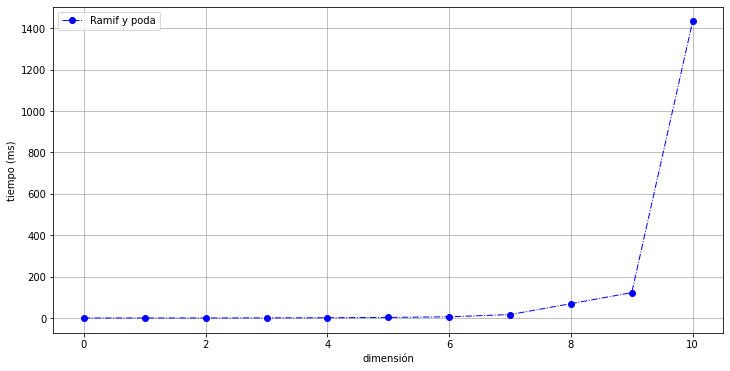

In [15]:

### Inicio de pruebas ##############################
max_n_dim = 10
max_value = 20
loops = 3

t_ramificacionypoda = np.zeros(max_n_dim+1)


for n in range (3, max_n_dim+1):
    tstart = datetime.now()
    for i in range(loops):
        costes_testeo = genera_matriz(n, max_value)
    tbase = ((datetime.now()-tstart)/loops).total_seconds() *1000  # base time: generating the matrix
    
    print (f"Iteracion {n}")

    t_ramificacionypoda [n] = timed_function (ramificacion_y_poda, n, max_value, loops).total_seconds() *1000 -tbase
    
    
   
### Representación gráfica #########################

x_data = np.arange(max_n_dim+1)
fig,axis = plt.subplots(1,1)
axis.plot(x_data,t_ramificacionypoda,'bo-.',label='Ramif y poda',linewidth=1) # creación del gráfico

axis.set_ylabel('tiempo (ms)')
axis.set_xlabel('dimensión')

axis.legend(loc='best')
plt.grid()
plt.gcf().set_size_inches(12, 6)
plt.show() 


##Descenso del gradiente

In [16]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [17]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente
 
df([1,2])

[2, 4]

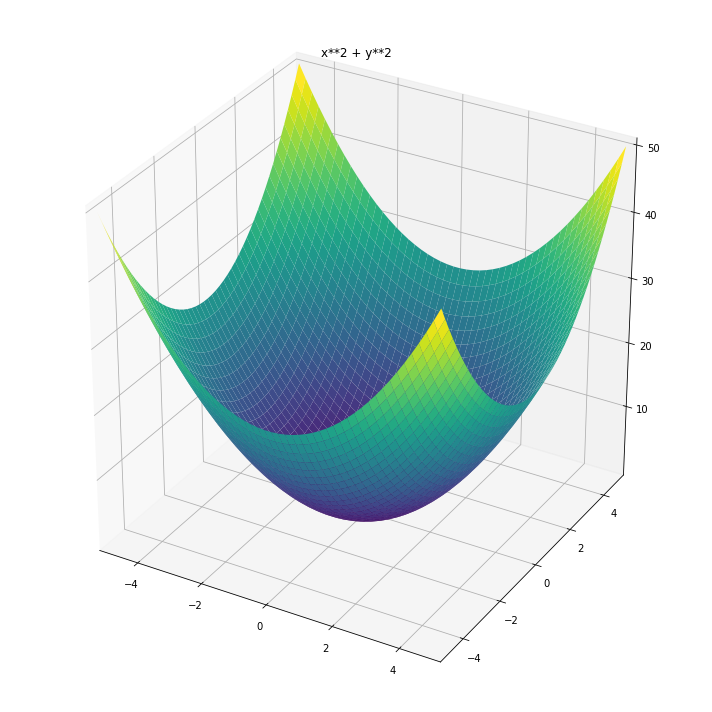

In [18]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

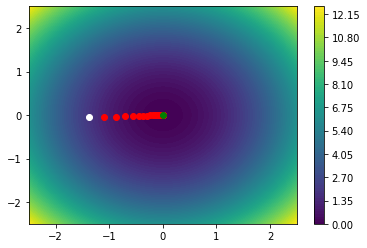

Solucion: [-1.9710948258193334e-05, -7.743035126415535e-07] 3.891210271668639e-10


In [19]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
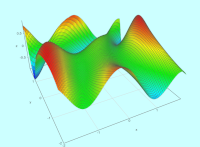


In [20]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


En primer lugar, creamos una función para obtener el gradiente de forma aproximada.

In [21]:
# Aproximación del gradiente

def df(p1):
  h=0.01
  p2 = np.copy (p1)
  grad = np.zeros(2)

  for i, v in enumerate (p1):
    p2[i] = p1[i] + h
    grad [i] = ( f(p2) - f(p1)  ) /h

  return grad

df([1.,2.])

array([-0.85899404,  3.10611858])

A continuación creamos una función para actualizar el valor de la tasa de aprendizaje en cada iteración. La tasa de aprendizaje irá disminuyendo de forma proporcional al cociente entre el gradiente de la iteración n y el de la iteración anterior n-1 (estoy asumiendo que conforme avanzan las iteraciones, estoy cada vez mas cerca del mínimo y por tanto el gradiente es cada vez menor).

In [22]:
def actualiza_t_a (t_a, grad, grad_1):

   gnorm = np.linalg.norm(grad)
   gnorm_1 = np.linalg.norm(grad_1)
   
 

   if (gnorm_1 != 0):
     t_a = t_a * abs ( gnorm /  gnorm_1 )
    #  print (f"Actualizando TA = {t_a}")


   return t_a

Finalmente, reutilizo el código propuesto antes para el paraboloide, pero dado que la función presenta multitud de crestas y valles, he optado por hacer una búsqueda con multiarranque, esto es creando una nube de puntos de inicio, de modo que el mínimo devuelto será el de menor valor encontrado de entre todas las trayectorias exploradas.

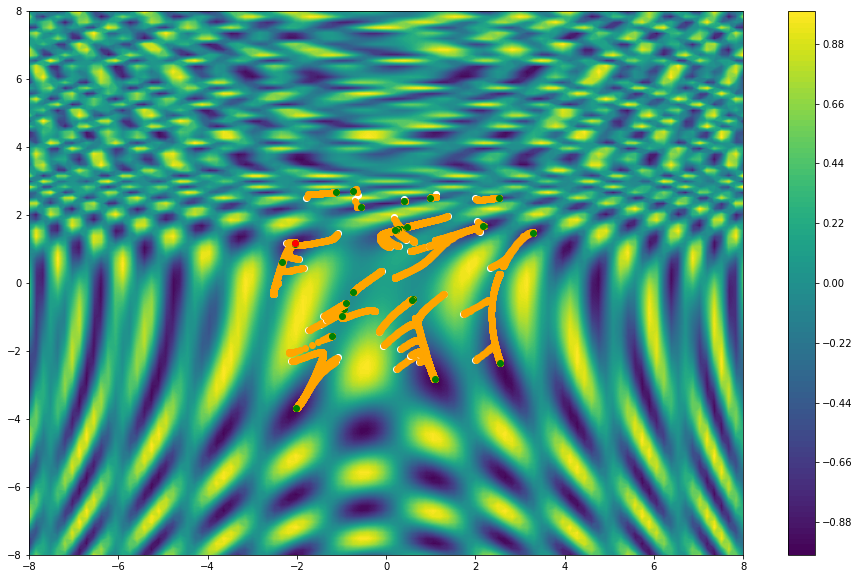

Solucion: [-2.0309276761976305, 1.173982305624178] -0.9998941134224391


In [23]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango = 8
n_pruebas = 50

 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

min = math.inf # Variable para almacenar el valor mínimo conseguido
P_min = None # Variable apra almacenar el punto correspondiente con el mínimo anterior

for i in range(n_pruebas):

  #Generamos un punto aleatorio inicial y pintamos de blanco
  P=[random.uniform(-rango/3,rango/3 ),random.uniform(-rango/3,rango/3 ) ]
  plt.plot(P[0],P[1],"o",c="white")

  #Tasa de aprendizaje. Variable: se reducirá a medida que nos acercamos.
  t_a=.01 
  
  grad = [0,0] #valor inicial necesario para que funcione la actualizacion de la tasa de aprendizaje
  
  #Iteraciones:500
  for _ in range(500):
    grad_1 = grad
    grad = df(P)
    # print(P,grad)
    t_a = actualiza_t_a (t_a, grad, grad_1)
    P[0],P[1] = P[0] - t_a*grad[0] , P[1] - t_a*grad[1]
    plt.plot(P[0],P[1],"o",c="orange")

  #Dibujamos el punto final y pintamos de verde
  plt.plot(P[0],P[1],"o",c="green")

  min_local = f(P)

  if (min_local < min):
    min = min_local
    P_min = P


plt.plot(P_min[0],P_min[1],"o",c="red")
plt.gcf().set_size_inches(16, 10)

plt.show()
# print("Solucion:" , P , f(P))
print("Solucion:" , P_min , min)